In [49]:
import nltk
nltk.download("popular")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [50]:
data = pd.read_csv("article.csv")

In [51]:
data

,source_text,plagiarized_text,label
0,Researchers have discovered a new species of b...,Scientists have found a previously unknown but...,1
1,The moon orbits the Earth in approximately 27....,Our natural satellite takes around 27.3 days t...,1
2,Water is composed of two hydrogen atoms and on...,H2O consists of 2 hydrogen atoms and 1 oxygen ...,1
3,The history of Rome dates back to 753 BC.,Rome has a long history that can be traced bac...,1
4,Pluto was once considered the ninth planet in ...,"In the past, Pluto was classified as the ninth...",1
5,This is a unique and original sentence.,This sentence is unique and original.,0
6,Artificial intelligence is reshaping industries.,AI is changing the landscape of various sectors.,0
7,Python is a popular programming language for d...,Data science often relies on Python as a widel...,0
8,The Earth revolves around the Sun in a nearly ...,Our planet follows an almost circular path as ...,0
9,Paris is the capital of France.,France's capital city is Paris.,0


In [52]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text
data["source_text"] = data["source_text"].apply(preprocess_text)
data["plagiarized_text"] = data["plagiarized_text"].apply(preprocess_text)

In [53]:
data["source_text"]

0    researchers discovered new species butterfly a...
1             moon orbits earth approximately 273 days
2    water composed two hydrogen atoms one oxygen atom
3                       history rome dates back 753 bc
4           pluto considered ninth planet solar system
5                             unique original sentence
6         artificial intelligence reshaping industries
7     python popular programming language data science
8      earth revolves around sun nearly circular orbit
9                                 paris capital france
Name: source_text, dtype: object

In [54]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data["source_text"] + " " + data["plagiarized_text"])
y = data["label"]

Accuracy: 1.0
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}}


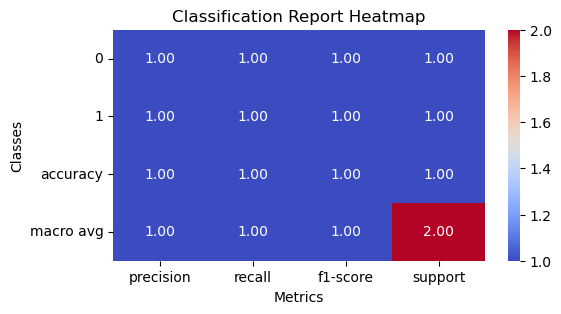

In [68]:
model = LogisticRegression()
model.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

plt.figure(figsize=(6, 3))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


In [56]:
joblib.dump(model, 'plagiarism_model.pkl')

['plagiarism_model.pkl']

In [57]:
# Load the saved model
loaded_model = joblib.load('plagiarism_model.pkl')

# New text for plagiarism detection
new_text = "A new group of researchers found out a new class of butterfly in the Amazon forest of rain."

# Preprocess the new text (e.g., apply the same preprocessing steps as during training)
new_text = preprocess_text(new_text)

# Convert the preprocessed text into TF-IDF vectors (assuming you have the vectorizer)
new_text_vector = tfidf_vectorizer.transform([new_text])

# Make predictions using the loaded model
prediction = loaded_model.predict(new_text_vector)

# Calculate cosine similarity between new text and training data
cosine_similarity_score = cosine_similarity(new_text_vector, X_train).max()

# Interpret the prediction and similarity score
if prediction[0] == 0:
    print("The text is not plagiarized.")
else:
    print(f"The text is plagiarized with a similarity score of {cosine_similarity_score*100:.2f}%.")

The text is plagiarized with a similarity score of 61.72%.


C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5
Classification Report:
{'0': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'accuracy': 0.5, 'macro avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 2.0}, 'weighted avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 2.0}}
Confusion Matrix:
[[1 0]
 [1 0]]


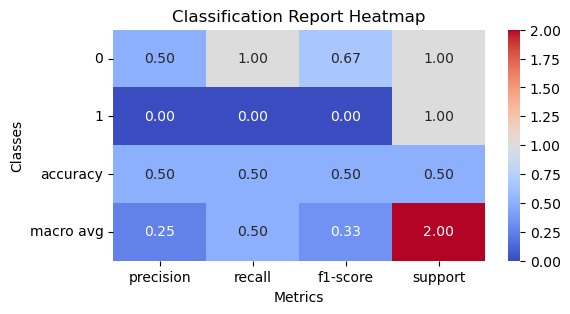

In [67]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(6, 3))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


Accuracy: 1.0
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}}
Confusion Matrix:
[[1 0]
 [0 1]]
Accuracy: 1.0
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}}
Confusion Matrix:
[[1 0]
 [0 1]]


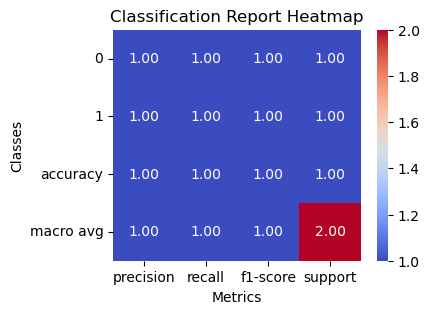

In [66]:
from sklearn.naive_bayes import MultinomialNB
# Instantiate the model
model = MultinomialNB()
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(4, 3))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91991\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5
Classification Report:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1.0}, 'accuracy': 0.5, 'macro avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 2.0}, 'weighted avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 2.0}}
Confusion Matrix:
[[0 1]
 [0 1]]


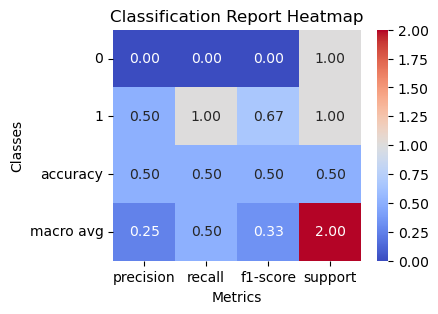

In [65]:
from sklearn.svm import SVC

# Instantiate the model
model = SVC(kernel='linear', random_state=42)
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)gm
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [38]:
import pickle

pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl','wb'))

In [39]:
model = pickle.load(open('model.pkl','rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))

In [40]:
def detect(input_text):
    vectorized_text = tfidf_vectorizer.transform([input_text])
    result = model.predict(vectorized_text)
    return "Plagiarim Detected" if result[0] == 1 else "No Plagiarism"


In [41]:
input_text = 'Researchers have discovered a new species of butterfly in the Amazon rainforest.'
detect(input_text)

'Plagiarim Detected'

In [42]:
# example ( it has no plagiarism)
input_text = 'Playing musical instruments enhances creativity.'
detect(input_text)

'Plagiarim Detected'

In [43]:
# example ( it has no plagarism)
input_text = 'Practicing yoga enhances physical flexibility.'
detect(input_text)

'Plagiarim Detected'